<a href="https://colab.research.google.com/github/seharkansal/ML-algorithms-from-Scratch-/blob/main/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
train_df=pd.read_csv("/content/mnist_train.csv")
test_df=pd.read_csv("/content/mnist_test.csv")

In [2]:
train_df.shape, test_df.shape

((60000, 785), (10000, 785))

In [3]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import numpy as np
train_arr=np.array(train_df)
test_arr=np.array(test_df)

In [5]:
Y_train

NameError: name 'Y_train' is not defined

In [6]:
#seperating the labels
X_train, Y_train=train_arr[:,1:],train_arr[:,0]
X_test, Y_test=test_arr[:,1:],test_arr[:,0]

In [7]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape
Y_train

array([5, 0, 4, ..., 5, 6, 8])

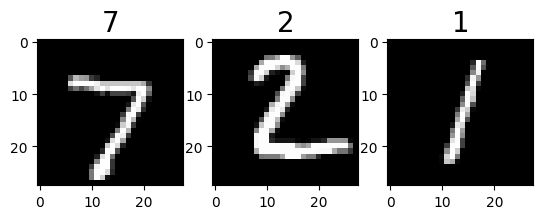

In [8]:
#checking if labels are correct or not
from matplotlib import pyplot as plt
import numpy as np

plt.figure()
for idx, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, idx + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title(Y_test[idx], fontsize = 20)


Text(0.5, 1.0, 'testing data samples distribution')

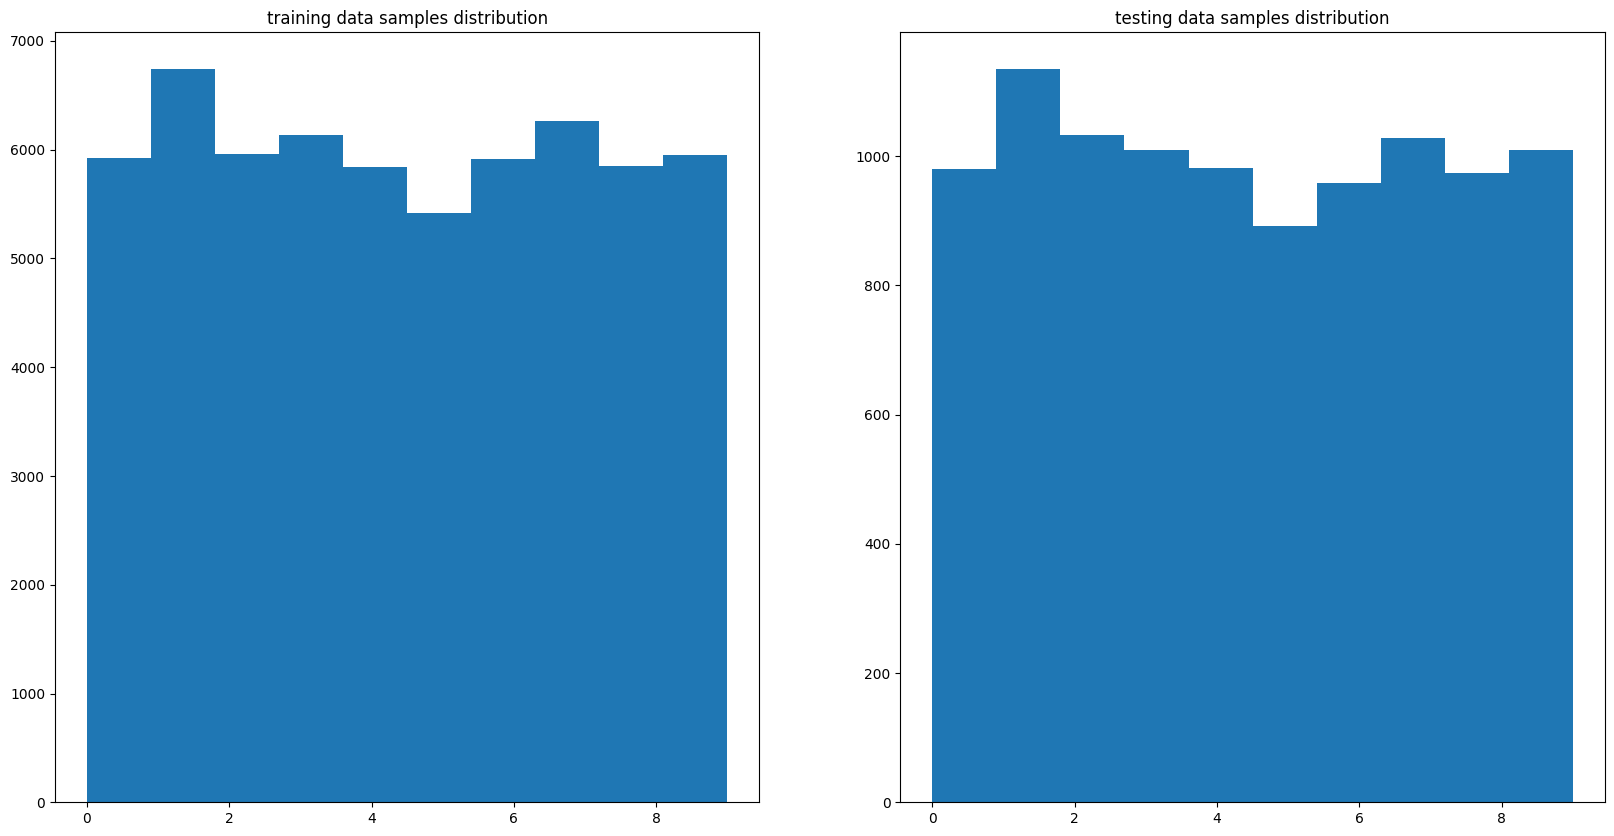

In [9]:
#checking distribution of data;for every class there should be equal number of samples
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist(Y_train)
plt.title("training data samples distribution")

plt.subplot(1,2,2)
plt.hist(Y_test)
plt.title("testing data samples distribution")

In [10]:
#normalizing the data
#X_train[0,:]
X_train_nor=X_train/255
X_test_nor=X_test/255
X_test_nor[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
#model building
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000,fit_intercept=True)
model.fit(X_train_nor,Y_train)


LogisticRegression(max_iter=1000)

In [12]:
import pickle
filename="logistic_regression_ocr.pickle"
file=open(filename,"wb")
pickle.dump(model,file)
file.close()

In [15]:
train_pred,test_pred=model.predict(X_train_nor),model.predict(X_test_nor)

In [16]:
#evaluating the performance
from sklearn.metrics import confusion_matrix, accuracy_score
train_acc=accuracy_score(Y_train,train_pred)
test_acc=accuracy_score(Y_test,test_pred)
print("training accuracy is:",round(train_acc*100,4))
print("testing accuracy is:",round(test_acc*100,4))

training accuracy is: 93.93
testing accuracy is: 92.56


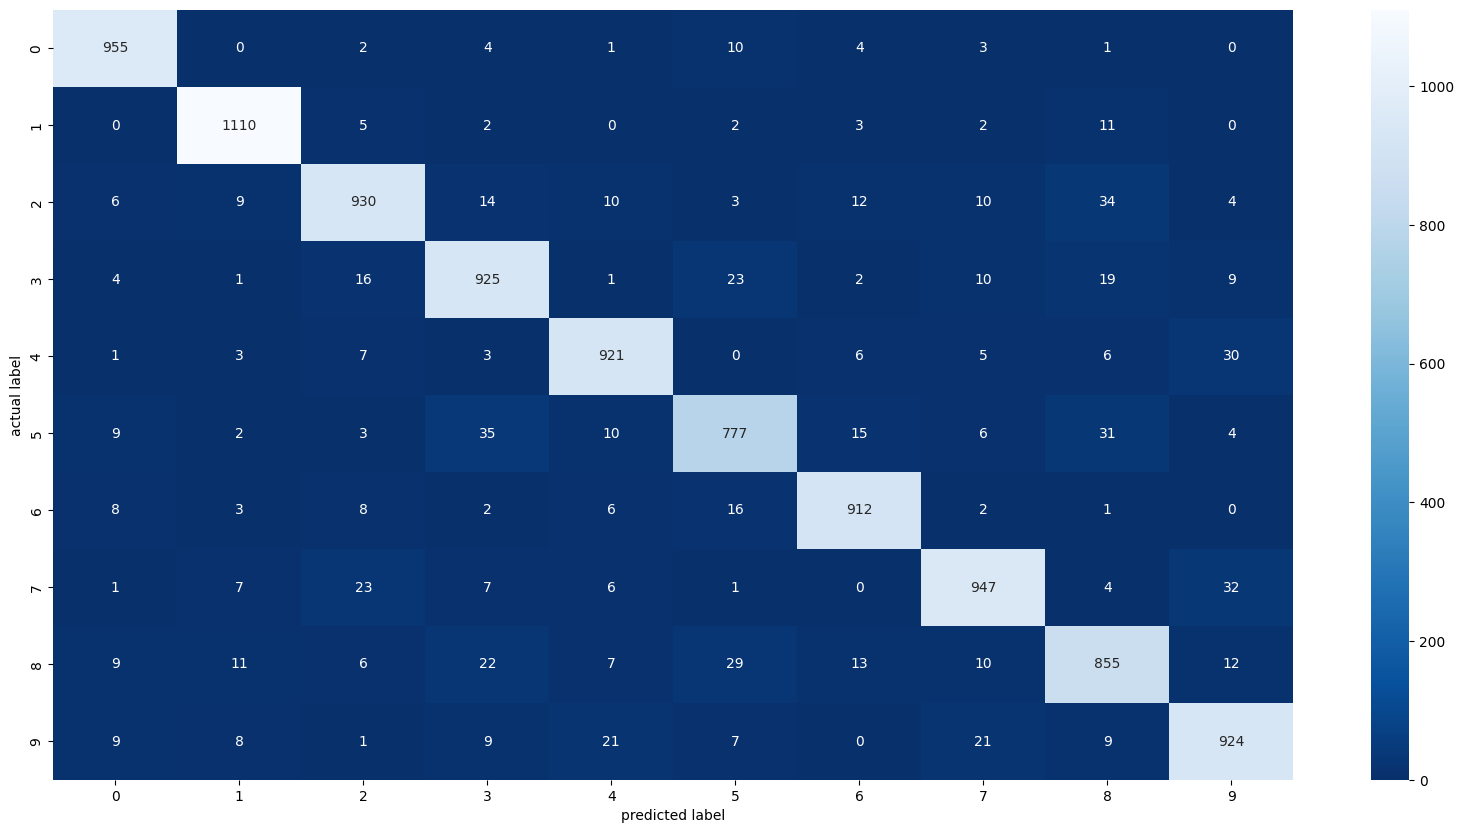

In [20]:
import seaborn as sns
cn=confusion_matrix(Y_test,test_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cn,annot=True,cmap="Blues_r",fmt="0.4g")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()